In [32]:
import pandas as pd
import numpy as np
import geopandas as gpd
import shapefile as shp
from sklearn.linear_model import LinearRegression
pd.set_option("display.max_rows", 10, "display.max_columns", 20)

In [36]:
#pd.set_option("display.max_rows", 10, "display.max_columns", 20)
df = pd.read_excel("data/bp-stats-review-2021-consolidated-dataset-panel-format.xlsx")
col = list(df.columns)
df.drop(col[11:32] + col[43:50], axis = 1, inplace= True)
#df.dropna(subset = list(df.columns), inplace = True)
df

,Country,Year,pop,ISO3166_alpha3,ISO3166_numeric,Region,SubRegion,OPEC,EU,OECD,...,ren_power_mtoe,ren_power_twh,renewables_ej,renewables_mtoe,solar_ej,solar_mtoe,solar_twh,wind_ej,wind_mtoe,wind_twh
0,Algeria,1965,12.550880,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Algeria,1966,12.902626,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Algeria,1967,13.275020,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Algeria,1968,13.663581,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Algeria,1969,14.061724,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6624,Zimbabwe,2016,14.030338,ZWE,716.0,Africa,Eastern Africa,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6625,Zimbabwe,2017,14.236599,ZWE,716.0,Africa,Eastern Africa,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6626,Zimbabwe,2018,14.438812,ZWE,716.0,Africa,Eastern Africa,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6627,Zimbabwe,2019,14.645473,ZWE,716.0,Africa,Eastern Africa,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
pd.set_option("display.max_rows", None, "display.max_columns", 20)
pd.DataFrame(df.columns)

,0
0,Country
1,Year
2,pop
3,ISO3166_alpha3
4,ISO3166_numeric
5,Region
6,SubRegion
7,OPEC
8,EU
9,OECD


In [4]:
max(list(pd.DataFrame(df.isnull().sum())[0]))

6457

In [5]:
df1 = df['Country'].value_counts()
df1

Algeria                         56
Morocco                         56
South Sudan                     56
South Korea                     56
South Africa                    56
                                ..
Madagascar                      26
Democratic Republic of Congo    26
Cuba                            26
Zambia                          26
New Caledonia                   26
Name: Country, Length: 123, dtype: int64

In [6]:
df1[df1 < 56]

Bolivia                         51
Myanmar                         51
Bangladesh                      50
Papua New Guinea                41
Zimbabwe                        40
Serbia                          40
Mongolia                        40
Mozambique                      26
Madagascar                      26
Democratic Republic of Congo    26
Cuba                            26
Zambia                          26
New Caledonia                   26
Name: Country, dtype: int64

In [7]:
df2 = df['Region'].value_counts()
df2

Europe                1888
Asia Pacific          1160
Africa                 902
S. & Cent. America     637
Middle East            616
CIS                    392
North America          168
Name: Region, dtype: int64

In [8]:
df2.value_counts()

1888    1
1160    1
902     1
637     1
616     1
392     1
168     1
Name: Region, dtype: int64

In [9]:
grp = df.groupby(['Country'])

In [10]:
df2 = grp.get_group('India')
temp = df2.isnull().sum()


In [11]:
df_hdi = pd.read_csv('data/HDI_modified.csv', encoding='latin1')
l = (f"Unnamed: {x}" for x in range(3, 60) if not (x%2 == 0))
df_hdi.drop(list(l), axis = 1, inplace = True)
df_hdi

,HDI Rank,Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,169,Afghanistan,0.302,0.307,0.316,0.312,0.307,0.331,0.335,0.339,...,0.472,0.477,0.489,0.496,0.5,0.5,0.502,0.506,0.509,0.511
1,69,Albania,0.65,0.631,0.615,0.618,0.624,0.637,0.646,0.645,...,0.745,0.764,0.775,0.782,0.787,0.788,0.788,0.790,0.792,0.795
2,91,Algeria,0.572,0.576,0.582,0.586,0.59,0.595,0.602,0.611,...,0.721,0.728,0.728,0.729,0.736,0.74,0.743,0.745,0.746,0.748
3,36,Andorra,..,..,..,..,..,..,..,..,...,0.837,0.836,0.858,0.856,0.863,0.862,0.866,0.863,0.867,0.868
4,148,Angola,..,..,..,..,..,..,..,..,...,0.517,0.533,0.544,0.555,0.565,0.572,0.578,0.582,0.582,0.581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,113,Venezuela (Bolivarian Republic of),0.644,0.654,0.66,0.662,0.662,0.666,0.668,0.67,...,0.757,0.769,0.772,0.777,0.775,0.769,0.759,0.743,0.733,0.711
185,117,Viet Nam,0.483,0.493,0.504,0.514,0.525,0.537,0.548,0.547,...,0.661,0.671,0.676,0.681,0.683,0.688,0.693,0.696,0.700,0.704
186,179,Yemen,0.401,0.401,0.404,0.406,0.408,0.414,0.421,0.426,...,0.506,0.506,0.504,0.509,0.502,0.483,0.474,0.467,0.468,0.470
187,146,Zambia,0.421,0.417,0.416,0.419,0.414,0.415,0.416,0.416,...,0.527,0.534,0.549,0.557,0.561,0.569,0.571,0.578,0.582,0.584


In [12]:
df_gdp = pd.read_csv("data/GDP_modified.csv", encoding='latin1')
l = (f"Unnamed: {x}" for x in range(3, 30) if not (x%2 == 0))
df_gdp.drop(list(l), axis = 1, inplace = True)
df_gdp

,HDI Rank,Country,1990,1995,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,169,Afghanistan,..,..,..,1377,2094,2038,2220,2264,2249,2213,2201,2203,2190,2202
1,69,Albania,4928,4565,6016,8208,10973,11283,11462,11598,11828,12126,12548,13037,13601,13962
2,91,Algeria,8607,7809,8572,10338,10796,10902,11055,11139,11329,11511,11638,11551,11479,11350
3,148,Angola,5758,4122,4707,6183,7692,7675,8037,8141,8240,8036,7569,7311,6934,6654
4,78,Antigua and Barbuda,15460,15628,18395,19668,18206,17604,17966,17642,18104,18595,19418,19840,21116,21908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,19,Liechtenstein,..,..,..,..,..,..,..,..,..,..,..,..,..,..
188,185,South Sudan,..,..,..,..,..,..,..,..,..,..,..,..,..,..
189,151,Syrian Arab Republic,..,..,..,..,..,..,..,..,..,..,..,..,..,..
190,113,Venezuela (Bolivarian Republic of),..,..,..,..,..,..,..,..,..,..,..,..,..,..


(252, 2)
               COUNTRY                                           geometry
0  Aruba (Netherlands)  POLYGON ((-69.88223 12.41111, -69.94695 12.436...
1  Antigua and Barbuda  MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...
2          Afghanistan  POLYGON ((61.27656 35.60725, 61.29638 35.62853...
3              Algeria  POLYGON ((-5.15213 30.18047, -5.13917 30.19236...
4           Azerbaijan  MULTIPOLYGON (((46.54037 38.87559, 46.49554 38...


<Figure size 7200x7200 with 0 Axes>

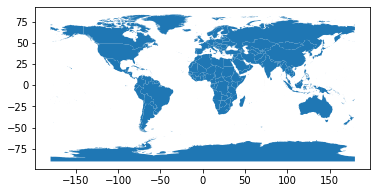

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (100, 100))
gdf = gpd.read_file("Shape file/World_Countries.shp")
print(gdf.shape)
print(gdf.head())
gdf.plot()
plt.show()

In [14]:
dict = {"column1": [1, 2 ,3], "Column2" :[np.nan, 5, 6]}
k = pd.DataFrame(dict)
k
k.dropna(subset = ["column1", "Column2"], inplace = True)
k

,column1,Column2
1,2,5.0
2,3,6.0


In [22]:
pd.set_option("display.column_space", 20)